In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
from scipy.stats import rankdata

In [86]:
from scipy import stats
import pandas as pd

In [2]:
mat = np.load('../data/null_scores_mat_10000x42809.npy')['mat']
print mat.shape

(10000, 42809)


In [10]:
rand_ints = np.random.choice(range(mat.shape[1]), 10, replace=False)
submat = mat[:, rand_ints]
print submat.shape
    

(10000, 10)


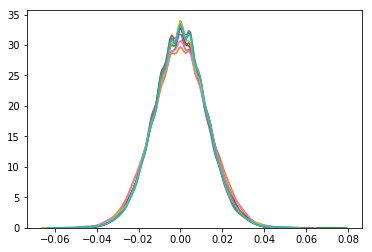

In [11]:
fig, ax = plt.subplots()
for i in range(10):
    ax = sns.distplot(submat[:, i], ax=ax, hist=False)
    
    

In [12]:
print mat.min(), mat.max()

-0.09 0.0813


In [14]:
help(rankdata)

Help on function rankdata in module scipy.stats.stats:

rankdata(a, method='average')
    Assign ranks to data, dealing with ties appropriately.
    
    Ranks begin at 1.  The `method` argument controls how ranks are assigned
    to equal values.  See [1]_ for further discussion of ranking methods.
    
    Parameters
    ----------
    a : array_like
        The array of values to be ranked.  The array is first flattened.
    method : str, optional
        The method used to assign ranks to tied elements.
        The options are 'average', 'min', 'max', 'dense' and 'ordinal'.
    
        'average':
            The average of the ranks that would have been assigned to
            all the tied values is assigned to each value.
        'min':
            The minimum of the ranks that would have been assigned to all
            the tied values is assigned to each value.  (This is also
            referred to as "competition" ranking.)
        'max':
            The maximum of the ranks 

In [76]:
# rankmat = np.apply_along_axis(rankdata, 1, mat[:, :17000])
# rankmat = np.apply_along_axis(rankdata, 1, mat)
rankmat = np.apply_along_axis(lambda x: rankdata(x, method='ordinal'), 1, np.abs(mat))


print rankmat.shape
print rankmat.min(), rankmat.max()

(10000, 42809)
1 42809


In [77]:
mean_ranks = rankmat.mean(axis=0)
std_ranks = rankmat.std(axis=0)
print mean_ranks.shape, std_ranks.shape

(42809,) (42809,)


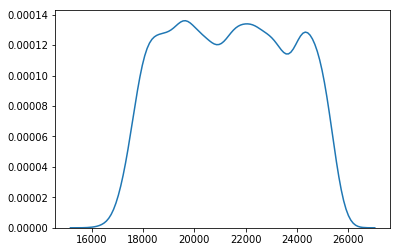

In [78]:
sns.distplot(mean_ranks, hist=False)

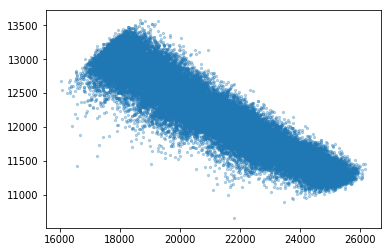

In [79]:
plt.scatter(mean_ranks, std_ranks, s=5, alpha=0.3)

In [80]:
obs_rank = 1.
i = 0

z = (obs_rank - mean_ranks[i]) / std_ranks[i]
pval = stats.norm.sf(abs(z))
print mat[:, i].mean()
print mean_ranks[i], std_ranks[i]
print z, pval

-0.00014985
17746.0397 13187.2501258
-1.34562092405 0.0892124000534


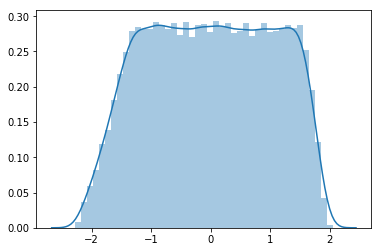

In [90]:
obs_ranks = np.arange(len(mean_ranks)) + 1
np.random.shuffle(obs_ranks)
zscores = (obs_ranks - mean_ranks) / std_ranks
sns.distplot(zscores)

0.0112511997564 0.499972526018


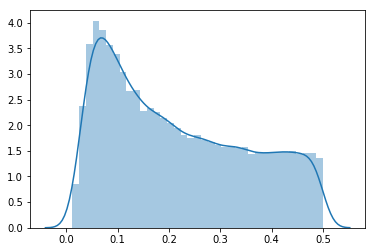

In [91]:
pvals = np.array([stats.norm.sf(abs(z)) for z in zscores])
print pvals.min(), pvals.max()
sns.distplot(pvals)

In [92]:
result_df = pd.DataFrame({'p': pvals, 'abs_ranks': obs_ranks, 'mean_ranks': mean_ranks, 'std_ranks':std_ranks})
result_df.sort_values('p').head(20)

,abs_ranks,mean_ranks,p,std_ranks
42464,86,25760.3285,0.011251,11251.891652
42787,131,25679.8021,0.011615,11256.824386
42363,190,25241.5850,0.012178,11126.717138
42342,71,25307.9697,0.012466,11254.221806
41120,185,25205.7983,0.012664,11188.217545
41706,118,25269.4692,0.012684,11249.641180
39845,267,25490.6957,0.012737,11290.086474
41931,342,25528.2784,0.012757,11276.472881
42364,348,25532.7826,0.012802,11282.621697
42339,358,25694.8318,0.012859,11359.543708


In [93]:
result_df.sort_values('abs_ranks').head(20)

,abs_ranks,mean_ranks,p,std_ranks
30605,1,23280.7968,0.023303,11699.171672
4187,2,18266.3655,0.078010,12875.064150
9533,3,19090.0650,0.065666,12649.914804
20788,4,20907.5627,0.042579,12142.527613
21270,5,21595.6281,0.037640,12138.083512
24838,6,21514.0893,0.036005,11955.237319
35988,7,24078.3951,0.017816,11456.528983
37241,8,24125.0646,0.017217,11403.113609
22204,9,22247.9826,0.034524,12231.962808
8108,10,20097.5923,0.062482,13092.610187


In [65]:
stats.norm.sf(abs(0)) 

0.5